In [26]:
from src.evaluate import build_ground_truth_spans, build_prediction_spans
from src.utils import read_jsonl
from src.evaluate import NUMERIC_TO_LEVEL_2
import matplotlib.pyplot as plt


In [27]:
dataset_path = "datasets/gold_standard_dataset.jsonl"
worst_prediction_path = "results/Falcon_7B_8-bit_level_2_results.jsonl"
best_prediction_path = "results/gpt-3.5_level_2_results.jsonl"

In [28]:
def predictions_per_span(all_y_pred):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
    "unknown": 0
}
    all_dict_spans = []
    for i in all_y_pred:
        dict_spans = {}
        for s in i.spans:
            if tuple(s.interval) not in dict_spans:
                dict_spans[tuple(s.interval)] = [NUMERIC_TO_LEVEL_2[s.label]]
            else:
                dict_spans[tuple(s.interval)].append(NUMERIC_TO_LEVEL_2[s.label])
        
        for s_key in dict_spans.keys():
            dict_spans[s_key] = set(dict_spans[s_key])
            for l in dict_spans[s_key]:
                labels_count[l] += 1

        all_dict_spans.append(dict_spans)
            
    return all_dict_spans, labels_count

In [29]:
def gold_truth_per_span(all_y_true):
    labels_count = {
    "nothing": 0,
    "appeal to positive emotion": 0,
    "appeal to anger": 0,
    "appeal to fear": 0,
    "appeal to pity": 0,
    "appeal to ridicule": 0,
    "appeal to worse problems": 0,
    "causal oversimplification": 0,
    "circular reasoning": 0,
    "equivocation": 0,
    "false analogy": 0,
    "false causality": 0,
    "false dilemma": 0,
    "hasty generalization": 0,
    "slippery slope": 0,
    "straw man": 0,
    "fallacy of division": 0,
    "ad hominem": 0,
    "ad populum": 0,
    "appeal to (false) authority": 0,
    "appeal to nature": 0,
    "appeal to tradition": 0,
    "guilt by association": 0,
    "tu quoque": 0,
}
    all_dict_spans = []
    for i in all_y_true:
        dict_spans = {}
        for s in i.spans:
            tmp_labels = []
            for l in s.labels:
                if l is not None:
                    tmp_labels.append(NUMERIC_TO_LEVEL_2[l])
                    
            dict_spans[tuple(s.interval)] = set(tmp_labels)
            for l in dict_spans[tuple(s.interval)]:
                labels_count[l] += 1
        
        all_dict_spans.append(dict_spans)

        
            
    return all_dict_spans, labels_count

In [30]:
def plot_bar_labels_count(labels_count):
    plt.figure(figsize=(12, 8))
    del labels_count["nothing"]
    plt.bar(list(labels_count.keys()), labels_count.values(), color='skyblue')
    plt.ylabel('Count')
    plt.xlabel('Fallacies')
    plt.title('Count for predicted fallacies')
    plt.xticks(rotation=90) 
    plt.tight_layout()
    plt.show()

In [31]:
gold_dataset = read_jsonl(dataset_path)
worst_pred_dataset = read_jsonl(worst_prediction_path)
best_pred_dataset = read_jsonl(best_prediction_path)

begin_instruction_tag = ""
end_instruction_tag = ""

all_y_true = []
# Build ground truth spans for each instance in the gold dataset
for i in gold_dataset:
    all_y_true.append(build_ground_truth_spans(i["text"], i["labels"]))

# Build predicted spans using the prediction dataset and the gold dataset
all_y_worst_pred = build_prediction_spans(
    worst_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

all_y_best_pred = build_prediction_spans(
    best_pred_dataset, gold_dataset, begin_instruction_tag, end_instruction_tag
)

In [32]:
all_dict_gold_spans, gold_labels_count = gold_truth_per_span(all_y_true)

all_dict_worst_pred_spans, worst_pred_labels_count = predictions_per_span(all_y_worst_pred)

all_dict_best_pred_spans, best_pred_labels_count = predictions_per_span(all_y_best_pred)



### Distribution of the Gold Truth Labels and  Predicted Labels

#### Gold Standard

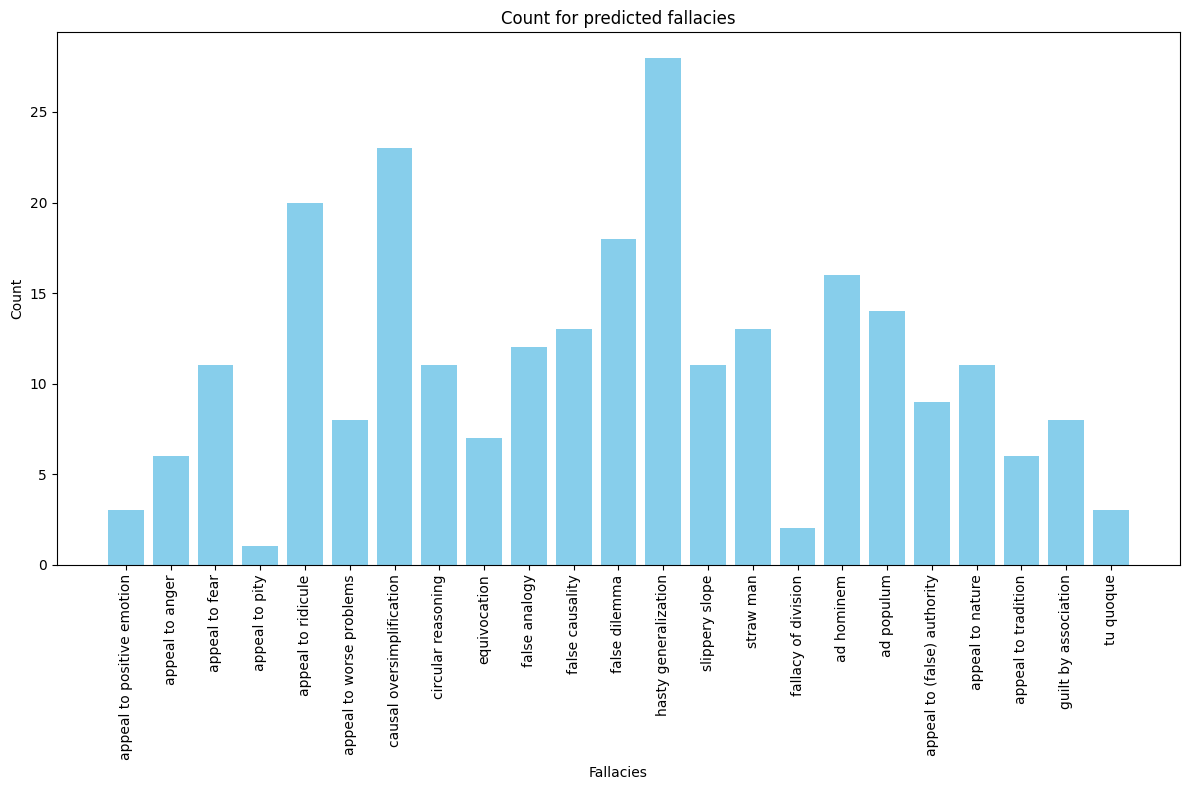

In [33]:
plot_bar_labels_count(gold_labels_count)

#### Worst Predictions

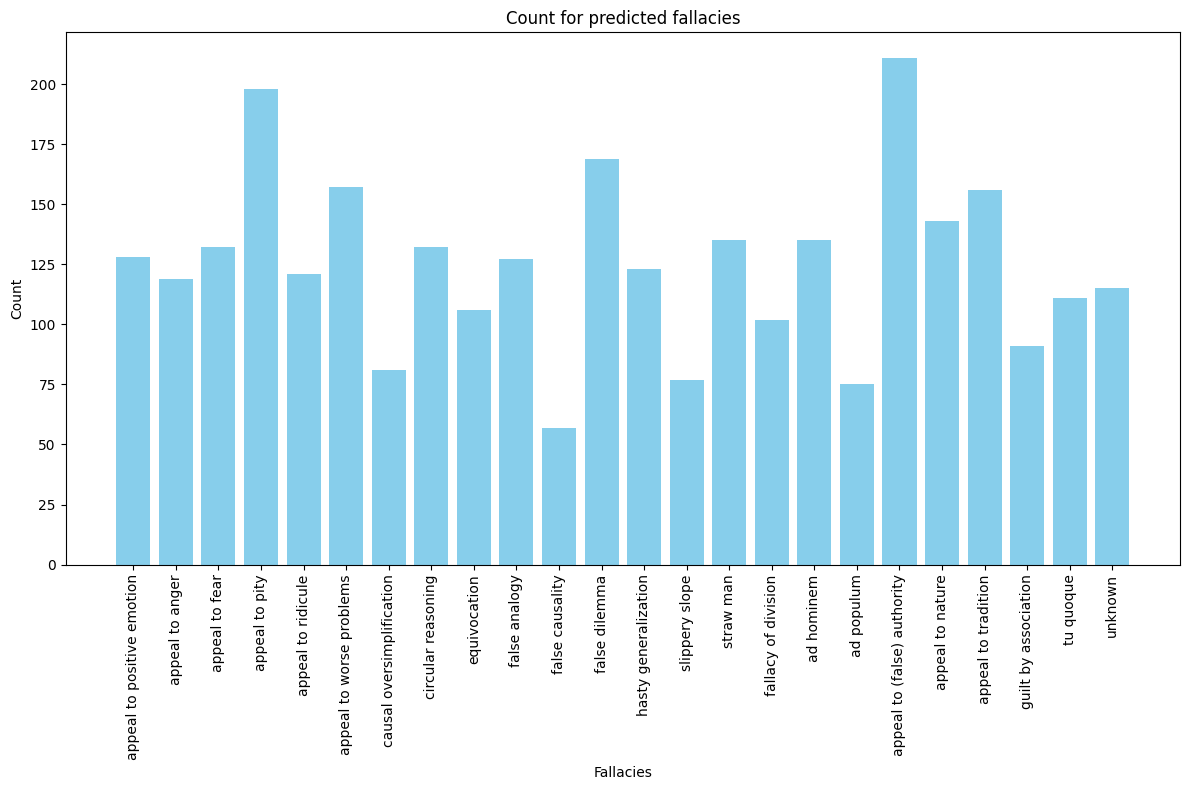

In [34]:
plot_bar_labels_count(worst_pred_labels_count)

#### Best Predictions

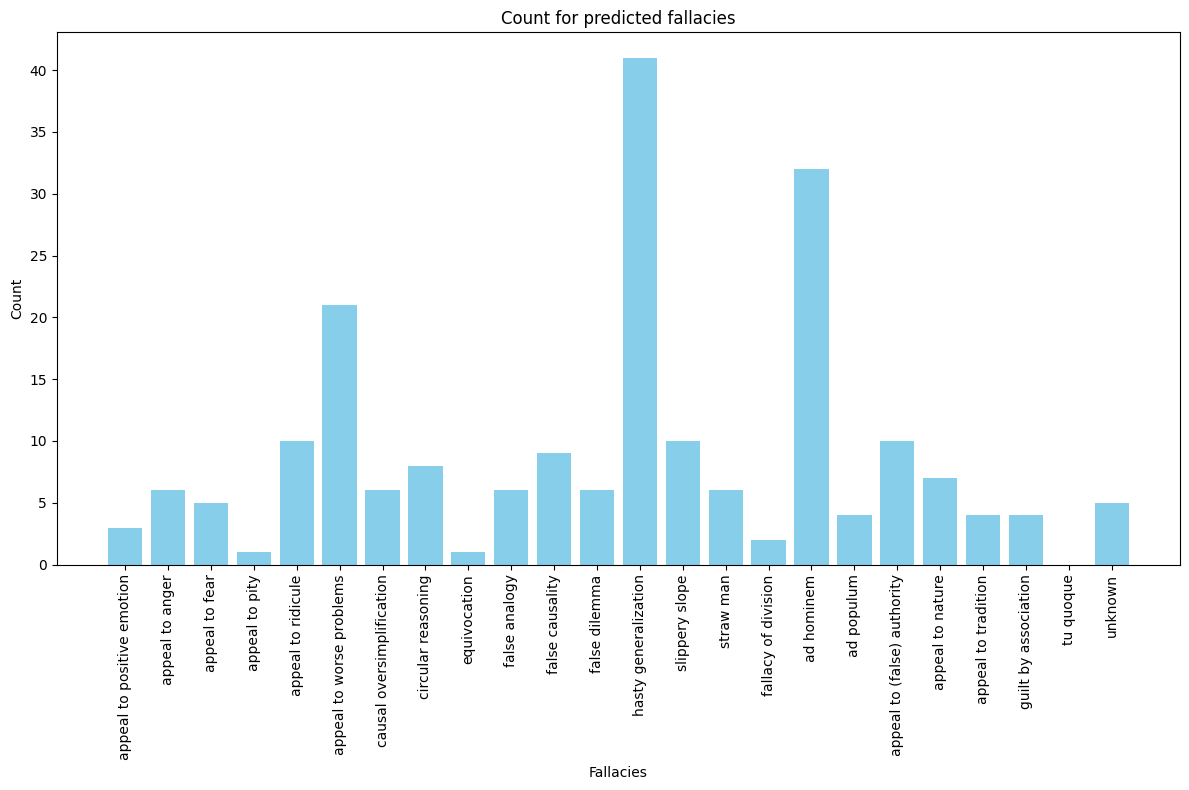

In [35]:
plot_bar_labels_count(best_pred_labels_count)

In [36]:
print(all_dict_best_pred_spans[1])
print(all_dict_gold_spans[1])

{(0, 83): {'nothing'}, (84, 145): {'hasty generalization'}}
{(84, 145): {'hasty generalization'}, (0, 83): set()}


### Average Fallacies per Predicted Span

In [42]:
def average_fallacies_per_predicted_span(all_dict_spans):
    count_fallacies = 0
    count_span = 0
    for i in all_dict_spans:
        for span in i.keys():
            if len(i[span]) == 1 and "nothing" in i[span]:
                continue
            if "nothing" in i[span]:
                count_fallacies += len(i[span]) - 1
            else:
                count_fallacies += len(i[span])
            count_span += 1

    return count_fallacies / count_span                

In [44]:
print("Average best model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_best_pred_spans))
print("Average worst model fallacies per fallacious span: ", average_fallacies_per_predicted_span(all_dict_worst_pred_spans))

Average best model fallacies per fallacious span:  1.0402010050251256
Average worst model fallacies per fallacious span:  4.8016
